In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from IPython.display import display_html

# Command to tell Python to actually display the graphs
%matplotlib inline

# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

from scipy.stats import zscore
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing

from sklearn import svm

from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import KFold, cross_val_score

from scipy import stats

from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

import pickle

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the DataSet and exporting that in the DataFrame
safety_df_bow = pd.read_csv("D:\\MS Data Science\\Project 10\\ps_bow.csv")
safety_df_bow.name = "BOW"
safety_df_bigram = pd.read_csv("D:\\MS Data Science\\Project 10\\ps_bigram.csv")
safety_df_bigram.name = "BIGRAM"
safety_df_trigram = pd.read_csv("D:\\MS Data Science\\Project 10\\ps_trigram.csv")
safety_df_trigram.name = "TRIGRAM"
safety_df_tfidf = pd.read_csv("D:\\MS Data Science\\Project 10\\nlp_chatbot_TF_IDF.csv")
safety_df_tfidf.name = "TFIDF"

In [3]:
# Function to display the dataset shape

def display_df(df_name):
    # Displaying the shape of the dataframe
    print("Shape of dataframe", df_name.name)
    print(df_name.shape)

In [4]:
# Function to upsample the target variable

def upsample_df(df_name):
    # Getting the unique value counts from the target column
    print("Displaying the unique values of target column for dataframe", df_name.name)
    print(df_name['Accident Level'].value_counts())
    # Splitting the data
    X = df_name.drop(columns='Accident Level')
    y = df_name['Accident Level']
    smote = SMOTE()
    # Upsampling the data
    X_smote, y_smote = smote.fit_resample(X,y)
    
    # Displaying the shape of the dataframe after upsampling
    print("The shape for data frame X")
    print(X_smote.shape)
    print("The shape for data frame y")
    print(y_smote.shape)
    print('Unique Values for the target variable after sampling:')
    print(y_smote.value_counts())
    
    # Splitting the training data and test data in 80:20 ratio
    X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.2, random_state = 10)
    
    # Displaying the shape of dataframe after split
    print("The shape for data frame X_train")
    print(X_train.shape)
    print("The shape for data frame X_test")
    print(X_test.shape)
    print("The shape for data frame y_train")
    print(y_train.shape)
    print("The shape for data frame y_test")
    print(y_test.shape)
    return X_train, y_train, X_test, y_test

In [5]:
# Declaring a list containing the dataframe
dataframe_list = [safety_df_bow, safety_df_bigram, safety_df_trigram, safety_df_tfidf]

# Calling the function to display the dataframe shape
for df_name in dataframe_list:
    display_df(df_name)

Shape of dataframe BOW
(418, 1057)
Shape of dataframe BIGRAM
(418, 1057)
Shape of dataframe TRIGRAM
(418, 1057)
Shape of dataframe TFIDF
(418, 157)


In [6]:
# Designing the dataframe to document the model performance

All_Model_Results = pd.DataFrame(columns=['Model Name','Training Accuracy','Testing Accuracy','Training Recall',
                                          'Testing Recall','Training Precision','Testing Precision'])

In [7]:
# Function to generate the model performance and the classification report

def Generate_Classification_Report(model_name, model_print_name):

    # Predicting target variable in traing and test data
    y_train_pred = model_name.predict(X_train)
    y_test_pred = model_name.predict(X_test)
    
    # Generating different parameters in model performance 
    train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
    test_accuracy = metrics.accuracy_score(y_test, y_test_pred)
    train_recall = metrics.recall_score(y_train, y_train_pred, average='macro')
    test_recall = metrics.recall_score(y_test, y_test_pred, average='macro')
    train_precision = metrics.precision_score(y_train, y_train_pred, average='macro')
    test_precision = metrics.precision_score(y_test, y_test_pred, average='macro')
    
    # Adding the model performance in the table for the final evaluation
    All_Model_Results.loc[len(All_Model_Results.index)] = [model_print_name, train_accuracy, test_accuracy,
                                                          train_recall,test_recall,train_precision,test_precision]  

    # Returning the relevant training, test and predicted data to generate the classification report
    return y_train, y_train_pred, y_test, y_test_pred

In [8]:
# Function to generate the confusion matrix for the models

def Generate_Confusion_Metrics(model_name):
    
    # Predicting target variable in traing and test data
    y_train_pred = model_name.predict(X_train)
    y_test_pred = model_name.predict(X_test)
    
    # Creating confusion matrix for training data
    c_matrix = metrics.confusion_matrix(y_train, y_train_pred)
    df_cmatrix_train = pd.DataFrame(c_matrix, index = [i for i in ["Actual 1","Actual 2","Actual 3","Actual 4","Actual 5"]],
                  columns = [i for i in ["Predicted 1","Precited 2","Predicted 3","Precited 4","Predicted 5"]])
    
    # Creating confusion matrix for test data
    c_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    df_cmatrix_test = pd.DataFrame(c_matrix, index = [i for i in ["Actual 1","Actual 2","Actual 3","Actual 4","Actual 5"]],
                  columns = [i for i in ["Predicted 1","Precited 2","Predicted 3","Precited 4","Predicted 5"]])

    # Returning confusion matrix for training data and test data
    return df_cmatrix_train, df_cmatrix_test

In [9]:
# Function to execute the Grid Search for the hyperparameters

def Execute_GridSearch_Store_Results(model_name, Grid_params):
    GS_Model = GridSearchCV(model_name, param_grid=Grid_params,
                           cv=5, verbose=1, n_jobs=-1)
    
    # Calculating the grid search result for the hyper parameters
    GS_Model.fit(X_train,y_train)
    GridS_results = pd.DataFrame(GS_Model.cv_results_)
    
    # Finding out the best performed parameters
    GridS_results.sort_values(by=['rank_test_score'],ascending=True) 
    print('The best results are ', GS_Model.best_params_)
    
    # Returning the best performed parameters
    return(GS_Model.best_params_)

In [10]:
# We will define the function to build and tune the following classifier models:
# SVM, Logistic Regression, KNN, Decision Tree, Random Forest, Adaptive Boosting and Gradient Boosting.
# We will first build a basic model for each algorithm mentioned above. 
# Then we will perform Grid Search to tune the model.
# We are defining 2 dictionary to store the classification reports and the confusion matrices.
# We will print those to compare the top performing models.
    
# Declaring hyper parameters for different models using gridsearch

# Parameters for SVM
GS_SVM_params = {
    "gamma": [0.025, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
    "C": range(1,15),
    'kernel': ['linear','rbf']
}


# Parameters for Logistic Regression
GS_LR_params = {'C' : [1, 2, 4],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 500, 1000, 1500]
}

# Parameters for KNN
GS_KNN_params = {
    "n_neighbors":range(3,12,2),
    "weights":['uniform', 'distance'],
    "algorithm" :['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Parameters for Decision Tree
GS_DT_params = {
    'criterion': ['gini','entropy'],
    'max_depth': range(1,10),
    'min_samples_split': range(1,10),
    'min_samples_leaf': range(1,5),
    'max_features': ['auto','sqrt','log2']
}

# Parameters for Random Forest
GS_RF_params = {
    'criterion': ['gini','entropy'],
    'max_depth': range(1,8),
    'min_samples_split': range(1,10),
    'min_samples_leaf': range(1,5),
    'max_features': ['sqrt','log2'],
    'n_estimators': range(20,100,20)
}

# Parameters for Adaptive Boosting
GS_ABCL_params = {
    'n_estimators': range(10,100,10),
    'learning_rate': [0.001, 0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Parameters for Gradient Boosting
GS_GBCL_params = {
    'loss' : ['log_loss', 'exponential'],
    'learning_rate' : [0.01, 0.1, 1.0],
    'n_estimators' : range(50, 120, 20),
    'criterion' : ['friedman_mse', 'squared_error'],
    'min_samples_split' : range(2, 9, 3),
    'min_samples_leaf' : [3, 4, 5]
}

model_num = 0
# Dictionary to store the classification report
class_matrix = {}
# Dictionary to store the classification matrix
conf_matrix = {}

# Defining the function for the model building
def model_building(df_name, X_train, y_train, X_test, y_test):
    
    global model_num
    
    # Instantiating SVM model
    clf_svm = svm.SVC(gamma=0.025, C=3) 
    clf_svm.fit(X_train , y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "SVM Initial Model " + df_name.name
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(clf_svm, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(clf_svm)

    
    clf_svm_tune = svm.SVC()
    # Calling the function to perform grid search and finding out the hyper parameters
    best_param = Execute_GridSearch_Store_Results(clf_svm_tune, GS_SVM_params)
    
    # Training the tuned model with hyper parameters received from the grid search
    clf_svm = svm.SVC(**best_param) 
    clf_svm.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "SVM Tuned Model " + df_name.name    
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(clf_svm, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(clf_svm)
    
    # Instantiating Logistic Regression model
    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "Logistic Regression Initial Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(lr_model, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(lr_model)
    
    clf_lr_tune = LogisticRegression()   
    # Calling the function to perform grid search and finding out the hyper parameters
    best_param = Execute_GridSearch_Store_Results(clf_lr_tune, GS_LR_params)
    
    # Training the tuned model with hyper parameters received from the grid search
    lr_model = LogisticRegression(**best_param)
    lr_model.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "Logistic Regression Tuned Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(clf_svm, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(clf_svm)
    
    # Instantiating KNN model
    KNN = KNeighborsClassifier(n_neighbors= 5)
    KNN.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "KNN Initial Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(KNN, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(KNN)
    
    KNN_tune = KNeighborsClassifier()
    # Calling the function to perform grid search and finding out the hyper parameters
    best_param = Execute_GridSearch_Store_Results(KNN_tune, GS_KNN_params)
    
    # Training the tuned model with hyper parameters received from the grid search
    KNN = KNeighborsClassifier(**best_param)
    KNN.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "KNN Tuned Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(KNN, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(KNN)
    
    # Instantiating Decision Tree model
    dTree = DecisionTreeClassifier(random_state = 1)
    dTree.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "Decision Tree Initial Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(dTree, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(dTree)

    dTree_GS = DecisionTreeClassifier()
    # Calling the function to perform grid search and finding out the hyper parameters
    best_param = Execute_GridSearch_Store_Results(dTree_GS,GS_DT_params)
    
    # Training the tuned model with hyper parameters received from the grid search
    dTree = DecisionTreeClassifier(**best_param)
    dTree.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "Decision Tree Tuned Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(dTree, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(dTree)
    
    # Instantiating Random Forest model
    rfcl = RandomForestClassifier(random_state = 1)
    rfcl.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "Random Forest Initial Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(rfcl, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(rfcl)
   
    rfcl_GS = RandomForestClassifier()
    # Calling the function to perform grid search and finding out the hyper parameters
    best_param = Execute_GridSearch_Store_Results(rfcl_GS, GS_RF_params)
    
    # Training the tuned model with hyper parameters received from the grid search
    rfcl = RandomForestClassifier(**best_param)
    rfcl.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "Random Forest Tuned Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(rfcl, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(rfcl)
    
    # Instantiating AdaBoost model
    abcl = AdaBoostClassifier(random_state = 1)
    abcl.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "AdaBoost Initial Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(abcl, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(abcl)
    
    abcl_GS = AdaBoostClassifier()
    # Calling the function to perform grid search and finding out the hyper parameters
    best_param = Execute_GridSearch_Store_Results(abcl_GS,GS_ABCL_params)
    
    # Training the tuned model with hyper parameters received from the grid search
    abcl = AdaBoostClassifier(**best_param)
    abcl.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "AdaBoost Tuned Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(abcl, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(abcl)
    
    # Instantiating Gradient Boosting model
    gbcl = GradientBoostingClassifier(random_state=1)
    gbcl.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "Gradient Boost Initial Model " + df_name.name
    model_num=model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(gbcl, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(gbcl)
    
    gbcl_GS = GradientBoostingClassifier()
    # Calling the function to perform grid search and finding out the hyper parameters
    best_param = Execute_GridSearch_Store_Results(gbcl_GS, GS_GBCL_params)
    
    # Training the tuned model with hyper parameters received from the grid search
    gbcl = GradientBoostingClassifier(**best_param)
    gbcl.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "Gradient Boost Tuned Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(gbcl, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(gbcl)
    
    model_num = model_num + 1

In [11]:
# Calling the model building functions for each dataset
for df_name in dataframe_list:
    X_train, y_train, X_test, y_test = upsample_df(df_name)
    model_building(df_name, X_train, y_train, X_test, y_test)

Displaying the unique values of target column for dataframe BOW
1    309
2     40
3     31
4     30
5      8
Name: Accident Level, dtype: int64
The shape for data frame X
(1545, 1056)
The shape for data frame y
(1545,)
Unique Values for the target variable after sampling:
1    309
4    309
3    309
2    309
5    309
Name: Accident Level, dtype: int64
The shape for data frame X_train
(1236, 1056)
The shape for data frame X_test
(309, 1056)
The shape for data frame y_train
(1236,)
The shape for data frame y_test
(309,)
Fitting 5 folds for each of 196 candidates, totalling 980 fits
The best results are  {'C': 14, 'gamma': 0.025, 'kernel': 'rbf'}
Fitting 5 folds for each of 60 candidates, totalling 300 fits
The best results are  {'C': 4, 'max_iter': 100, 'solver': 'sag'}
Fitting 5 folds for each of 40 candidates, totalling 200 fits
The best results are  {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}
Fitting 5 folds for each of 1944 candidates, totalling 9720 fits
The best re

In [12]:
# Displaying the model performance
All_Model_Results

,Model Name,Training Accuracy,Testing Accuracy,Training Recall,Testing Recall,Training Precision,Testing Precision
0,SVM Initial Model BOW,0.976537,0.899676,0.976746,0.894315,0.976568,0.900849
1,SVM Tuned Model BOW,0.989482,0.915858,0.989534,0.912598,0.989543,0.919486
2,Logistic Regression Initial Model BOW,0.985437,0.912621,0.985638,0.912371,0.985678,0.909061
3,Logistic Regression Tuned Model BOW,0.989482,0.915858,0.989534,0.912598,0.989543,0.919486
4,KNN Initial Model BOW,0.800971,0.728155,0.797782,0.737793,0.856606,0.591923
5,KNN Tuned Model BOW,0.852751,0.754045,0.850149,0.768308,0.888723,0.748776
6,Decision Tree Initial Model BOW,0.998382,0.857605,0.998333,0.856767,0.998444,0.852501
7,Decision Tree Tuned Model BOW,0.544498,0.508091,0.548504,0.492490,0.585410,0.543033
8,Random Forest Initial Model BOW,0.998382,0.915858,0.998382,0.917332,0.998391,0.914731
9,Random Forest Tuned Model BOW,0.870550,0.773463,0.870723,0.768020,0.870827,0.765062


In [13]:
# Designing the dataframe to document the model performance average for each dataset

All_Dataset_Average = pd.DataFrame(columns=['Dataset Name','Training Accuracy','Testing Accuracy','Training Recall',
                                          'Testing Recall','Training Precision','Testing Precision'])

In [14]:
# Function to calculate the average training and testing accuracy, recall and precision specific to each dataset 
def result_avg(df_name):
    row_count = 0
    train_acc = 0
    test_acc = 0
    train_rec = 0
    test_rec = 0
    train_prec = 0
    test_prec = 0
    
    # Summing up all the parameters for each dataset
    for i in All_Model_Results.index:
        if(All_Model_Results['Model Name'][i]).endswith(df_name.name):
            train_acc = train_acc + All_Model_Results['Training Accuracy'][i]
            test_acc = test_acc + All_Model_Results['Testing Accuracy'][i]
            train_rec = train_rec + All_Model_Results['Training Recall'][i] 
            test_rec = test_rec + All_Model_Results['Testing Recall'][i]
            train_prec = train_prec + All_Model_Results['Training Precision'][i]
            test_prec = test_prec + All_Model_Results['Testing Precision'][i]
            
            row_count = row_count + 1
    
    #Calculating the average of all the parameters for each dataset
    train_acc_avg = train_acc/row_count
    test_acc_avg = test_acc/row_count
    train_rec_avg = train_rec/row_count
    test_rec_avg = test_rec/row_count
    train_prec_avg = train_prec/row_count
    test_prec_avg = test_prec/row_count
    
    # Adding the model performance in the table for the final evaluation
    All_Dataset_Average.loc[len(All_Dataset_Average.index)] = [df_name.name, train_acc_avg, test_acc_avg,
                                                          train_rec_avg, test_rec_avg, train_prec_avg, test_prec_avg]

In [15]:
# Calling the function to calculate the average for the parameters for each dataset
for df_name in dataframe_list:
    result_avg(df_name)

In [16]:
# Sorting the performance related parameters for each dataset based on the Testing Accuracy
All_Dataset_Average = All_Dataset_Average.sort_values(by = 'Testing Accuracy', ascending = False)
All_Dataset_Average

,Dataset Name,Training Accuracy,Testing Accuracy,Training Recall,Testing Recall,Training Precision,Testing Precision
3,TFIDF,0.918458,0.870319,0.917998,0.873446,0.912485,0.864475
0,BOW,0.863384,0.789413,0.862986,0.790302,0.862095,0.771524
1,BIGRAM,0.796001,0.714979,0.795803,0.715971,0.813475,0.737809
2,TRIGRAM,0.768551,0.678456,0.768050,0.679666,0.779217,0.678151


In [17]:
# Displaying the model performance sorted by Testing Accuracy percentage of the model
All_Model_Results = All_Model_Results.sort_values(by = 'Testing Accuracy', ascending = False) 
All_Model_Results

,Model Name,Training Accuracy,Testing Accuracy,Training Recall,Testing Recall,Training Precision,Testing Precision
50,Random Forest Initial Model TFIDF,0.999191,0.977346,0.999222,0.977469,0.999170,0.976946
45,Logistic Regression Tuned Model TFIDF,0.997573,0.970874,0.997569,0.973221,0.997566,0.968596
43,SVM Tuned Model TFIDF,0.997573,0.970874,0.997569,0.973221,0.997566,0.968596
51,Random Forest Tuned Model TFIDF,0.977346,0.941748,0.977632,0.942192,0.977674,0.940052
44,Logistic Regression Initial Model TFIDF,0.958738,0.941748,0.958928,0.942911,0.958579,0.938984
55,Gradient Boost Tuned Model TFIDF,0.999191,0.928803,0.999222,0.928443,0.999170,0.924836
42,SVM Initial Model TFIDF,0.939320,0.928803,0.938944,0.929991,0.940128,0.927481
1,SVM Tuned Model BOW,0.989482,0.915858,0.989534,0.912598,0.989543,0.919486
3,Logistic Regression Tuned Model BOW,0.989482,0.915858,0.989534,0.912598,0.989543,0.919486
8,Random Forest Initial Model BOW,0.998382,0.915858,0.998382,0.917332,0.998391,0.914731


In [18]:
# The index of the models for the 5 best performing models
model_index = All_Model_Results.head(5).index

# Creating the Classification Reports for the 5 best performing models
for i in model_index:
    print("Classition Report for Model number", i)
    print("Train Classification Report for " + All_Model_Results['Model Name'][i])
    print(metrics.classification_report(class_matrix[i][0], class_matrix[i][1]));

    print ("\n")

    print("Test Classification Report for " + All_Model_Results['Model Name'][i])
    print(metrics.classification_report(class_matrix[i][2], class_matrix[i][3]));
    print("===")

Classition Report for Model number 50
Train Classification Report for Random Forest Initial Model TFIDF
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       242
           2       1.00      1.00      1.00       257
           3       1.00      1.00      1.00       255
           4       1.00      1.00      1.00       240
           5       1.00      1.00      1.00       242

    accuracy                           1.00      1236
   macro avg       1.00      1.00      1.00      1236
weighted avg       1.00      1.00      1.00      1236



Test Classification Report for Random Forest Initial Model TFIDF
              precision    recall  f1-score   support

           1       0.95      0.94      0.95        67
           2       0.98      0.96      0.97        52
           3       0.96      1.00      0.98        54
           4       0.99      0.99      0.99        69
           5       1.00      1.00      1.00        67

    accuracy  

Model Number 50
Random Forest Initial Model TFIDF


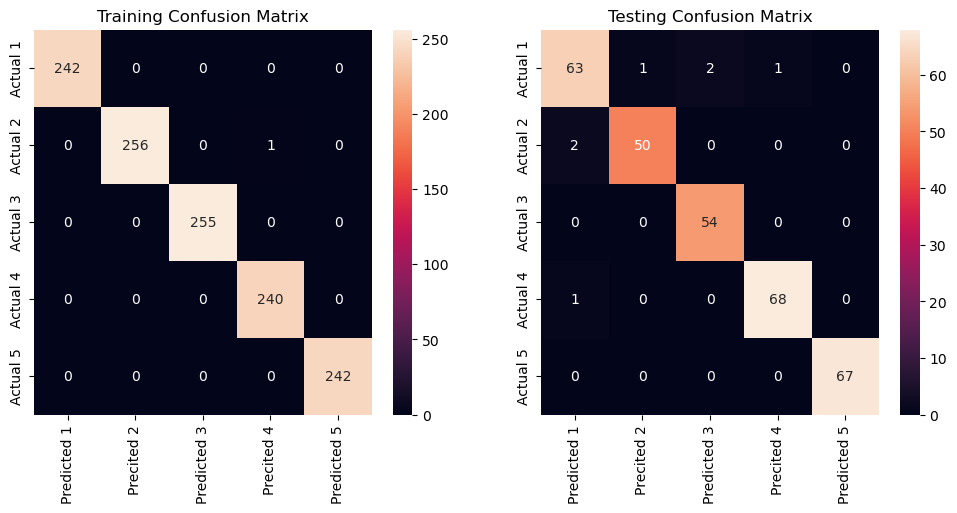

Model Number 45
Logistic Regression Tuned Model TFIDF


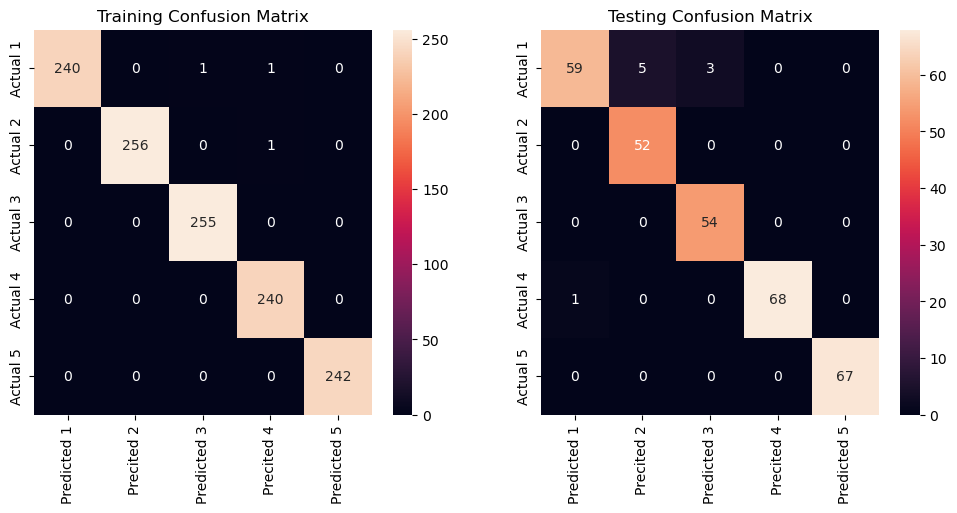

Model Number 43
SVM Tuned Model TFIDF


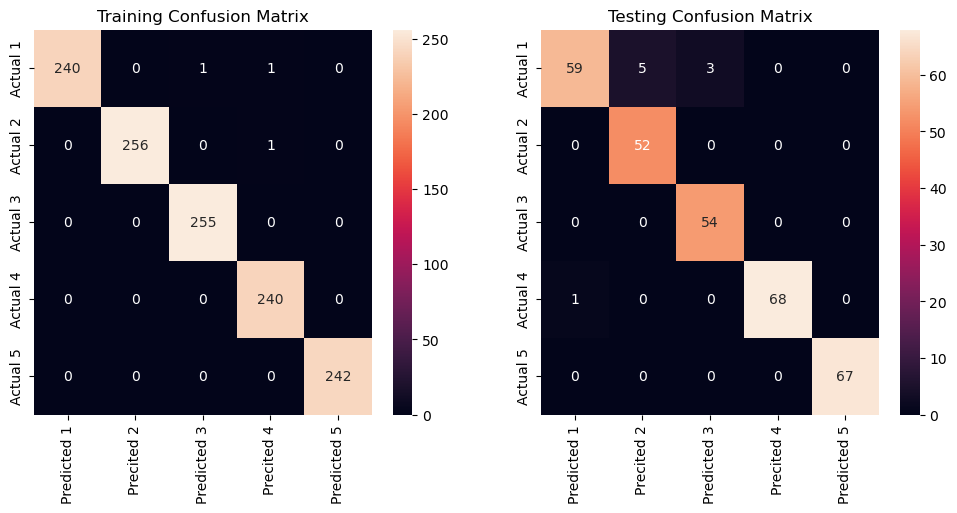

Model Number 51
Random Forest Tuned Model TFIDF


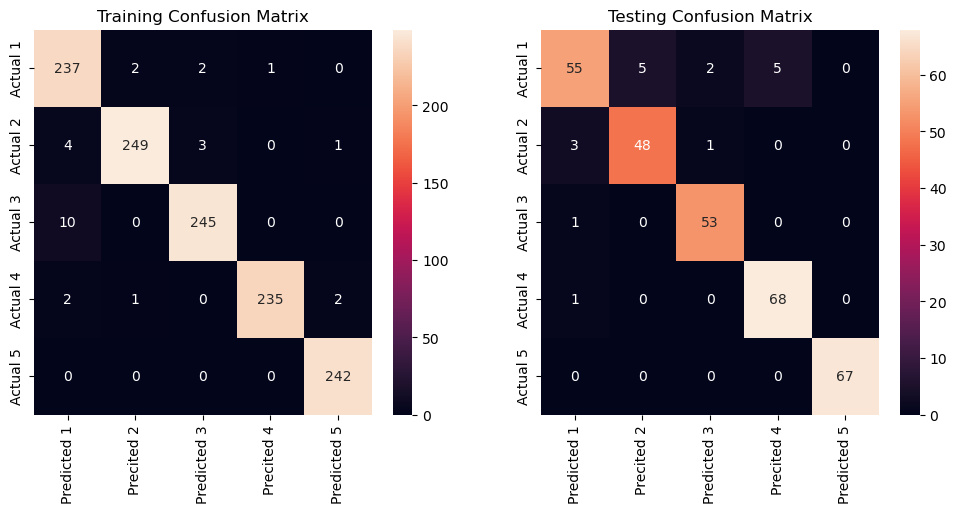

Model Number 44
Logistic Regression Initial Model TFIDF


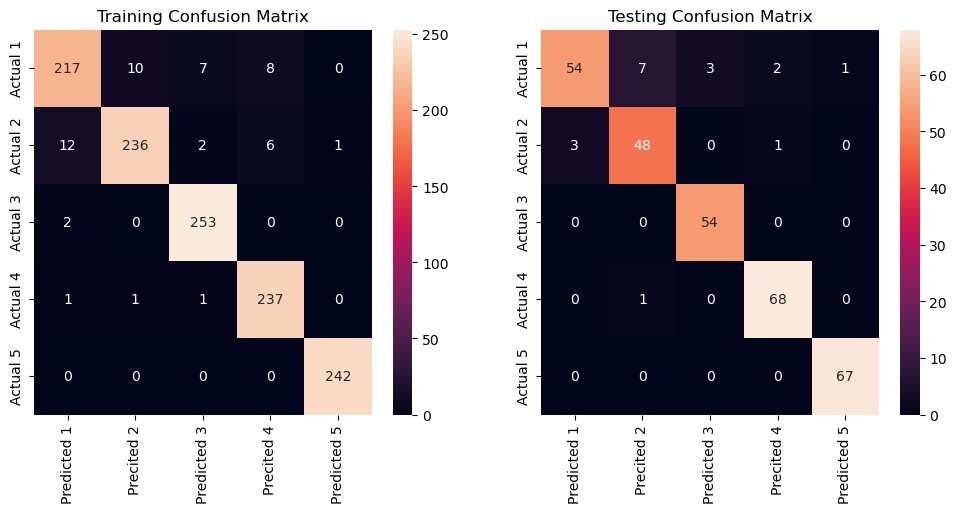

In [19]:
# Creating the Confusion Matrices for the 5 best performing models

for i in model_index:  
    print("========================================")
    print("Model Number", i)
    print(All_Model_Results['Model Name'][i])
    print("========================================")
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
    ax1.set_title('Training Confusion Matrix')
    sns.heatmap(conf_matrix[i][0], annot=True, fmt='.0f', ax=ax1)

    ax2.set_title('Testing Confusion Matrix')
    sns.heatmap(conf_matrix[i][1], annot=True, fmt='.0f', ax=ax2)

    plt.show()